# Project M1 - Cell Type Classification using Neural Network
### The objective of this project is to classify two cell types (spiny/aspiny) according to their electrophysiology features using both logistic regression and neural network.
#### The data set is downloaded from the __[Allen Institute data base](http://alleninstitute.github.io/AllenSDK/_static/examples/nb/cell_types.html#Computing-Electrophysiology-Features)__ and is already saved in the file "ElecPhyFeatures.csv".
#### Two examples for classifying Iris data set using logistic regression and neural network are given in notebooks "logistic-regression-for-iris-classification.ipynb" and "Iris_NeuralNetworkTutorial.ipynb" respectively. You can start with these two examples before you work on the Allen's data set.

## Getting start with the Allen's data set
Use python library Pandas to read the csv file. The data set is now stored in Pandas dataframe.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("ElecPhyFeatures.csv",index_col=0)
df

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,dendrite_type
0,NaN,134.700000,22.697498,8.335459e-02,1.187680,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,1.134780,-56.593754,-57.739586,-74.143753,3.029695,3.061646,2.969821,-80.468750,-73.553391,spiny
1,NaN,NaN,-24.887498,-3.913630e-19,1.099840,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,1.160940,-55.406254,-55.242191,-73.500000,2.441895,2.245653,2.231575,-84.406258,-73.056595,spiny
2,0.009770,39.044800,-46.765002,5.267857e-01,1.157840,2.551310,1.025387,-59.500000,-58.234378,-59.940975,...,1.089851,-60.062500,-58.570314,-61.371531,2.023762,2.162878,2.006406,-93.375008,-60.277321,aspiny
3,-0.007898,117.816429,5.996250,1.542553e-01,1.989165,9.572025,1.028733,-47.531250,-50.359375,-65.500000,...,1.423229,-49.406254,-52.718752,-75.273443,3.105931,3.491663,1.733896,-87.656250,-75.205559,aspiny
4,0.022842,68.321429,14.910000,1.714041e-01,1.081980,2.462880,1.025620,-48.437504,-46.520837,-51.406253,...,1.479690,-53.000004,-54.645837,-64.250003,3.285760,3.363504,4.234701,-81.625008,-63.474991,spiny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,0.001963,9.182407,-1.750000,1.013889e+00,1.030300,12.216160,1.024077,-58.781250,-56.218753,-62.375003,...,1.255667,-58.937500,-56.322920,-78.666672,1.477299,1.234940,1.447535,-88.937508,-78.321983,aspiny
2329,0.064670,102.640000,25.802499,1.585265e-01,1.273960,2.804420,1.025750,-49.187504,-49.062500,-50.593752,...,1.979330,-61.281254,-59.187500,-74.328125,3.919119,4.053287,4.134621,-96.250008,-74.360977,spiny
2330,0.239796,27.853333,-2.267500,7.307692e-02,1.095120,2.426287,1.025020,-51.531250,-50.437501,-52.481252,...,1.633196,-51.593750,-50.510418,-70.618750,2.646425,2.688956,2.838209,-95.000008,-70.443848,sparsely spiny
2331,0.066685,119.322857,-15.087501,1.131737e-01,1.318820,3.928953,1.024840,-52.406250,-54.854169,-52.268752,...,1.888704,-52.406250,-54.937503,-75.993753,3.560123,3.500551,3.714190,-98.593758,-79.264778,spiny


Find the features with no missing data. You will choose any combination of features you want (avoid using those 'features' that are actually IDs) as input to the classifier. You will get bonus points if you figure out which features are most useful in distinguishing the cell type.

In [2]:
idx_no_nan = np.nonzero([~np.isnan(df[features].values).any() for features in df.columns[:-1]])[0]
# features that have no missing data which you can choose from
df.columns[idx_no_nan]

Index(['f_i_curve_slope', 'fast_trough_t_long_square',
       'fast_trough_t_short_square', 'fast_trough_v_long_square',
       'fast_trough_v_short_square', 'has_burst', 'has_delay', 'has_pause',
       'id', 'input_resistance_mohm', 'latency', 'peak_t_long_square',
       'peak_t_short_square', 'peak_v_long_square', 'peak_v_short_square',
       'rheobase_sweep_id', 'rheobase_sweep_number', 'ri', 'sag', 'seal_gohm',
       'specimen_id', 'tau', 'threshold_i_long_square',
       'threshold_i_short_square', 'threshold_t_long_square',
       'threshold_t_short_square', 'threshold_v_long_square',
       'threshold_v_short_square', 'thumbnail_sweep_id',
       'trough_t_long_square', 'trough_t_short_square', 'trough_v_long_square',
       'trough_v_short_square', 'upstroke_downstroke_ratio_long_square',
       'upstroke_downstroke_ratio_short_square', 'vm_for_sag', 'vrest'],
      dtype='object')

The cell type is determined by the dendrite type in the last column of the data set. There is a minority type called "sparsely spiny". You can do either a 3-class classification or a binary classification excluding the "sparsely spiny".

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

sel_feature = ['f_i_curve_slope','vrest'] # Select features
X = df[sel_feature].values
Y = df['dendrite_type'].values
y = np.where(Y=='spiny',1,0)
y[np.nonzero(Y=='sparsely spiny')[0]] = 2

Plot classes based on the two features selected. As you can see, the classes are more seperable under the feature "f_i_curve_slope" rather then "Vrest".

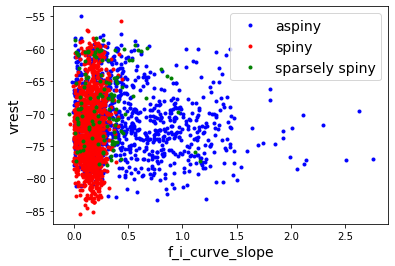

In [4]:
plt.figure(1, figsize=(6,4))
plt.plot(X[:,0][y==0], X[:, 1][y==0], "b.", label="aspiny")
plt.plot(X[:,0][y==1], X[:, 1][y==1], "r.", label="spiny")
plt.plot(X[:,0][y==2], X[:, 1][y==2], "g.", label="sparsely spiny")
plt.xlabel(sel_feature[0], fontsize=14)
plt.ylabel(sel_feature[1], fontsize=14)
plt.legend(loc="best", fontsize=14)
plt.show()

### Now you have defined the training data set and the class labels. Next train the logistic regression classifier and the neural network like in the two examples and compare the performance of these two methods.

In [32]:
# let's first try to select features in a principled manner
# targeting the spiny/aspiny classification
all_features_df = df[df.columns[idx_no_nan]]
all_X = all_features_df.values
binary_y = y[y != 2]
binary_X = all_X[y != 2]
print(binary_X.shape)
original_features_X = X[y != 2]
print(original_features_X.shape)

(2213, 37)
(2213, 2)


Let's select the 4 features with the most mutual information with the target variable

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
feature_selector = SelectKBest(mutual_info_classif, k=5)
X_new = feature_selector.fit_transform(binary_X, binary_y)
X_new.shape

(2213, 5)

### specimen_id?

it's strange to me that specimen_id is correlated with the outcome, let's look...

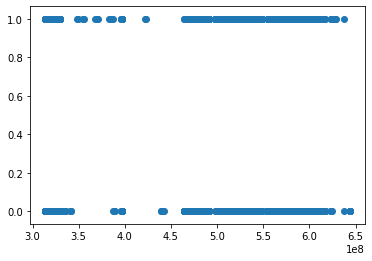

In [36]:
plt.scatter(all_features_df['specimen_id'].values[y != 2], binary_y)


interestingly, there are indeed blocks where the specimen Id is ONLY for the spiny class in that range.  I think we'll just cut that feature out.  it's just bias in what order the samples were documented in.

In [44]:
support_cols = all_features_df.columns[feature_selector.get_support()]
selected_binary_X = all_features_df[support_cols[support_cols != 'specimen_id']].values[y != 2]
print(selected_binary_X.shape)
print(binary_y.shape)

(2213, 4)
(2213,)


## Logistic regression

Here we'll train a model both on the proposed 2 features from the problem and from the 4 features selected by mutual information

In [55]:
# 4 BEST FEATURES
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(solver='lbfgs')
X_train, X_test, y_train, y_test = train_test_split(selected_binary_X, binary_y, test_size=0.2, random_state=1986)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
reg.fit(X_train_transformed, y_train)
y_hat = reg.predict(X_test_transformed)
confusion_matrix(y_test, y_hat)

array([[163,  39],
       [ 20, 221]])

In [56]:
# 2 ORIGINALLY PROPOSED FEATURES
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(solver='lbfgs')
X_train, X_test, y_train, y_test = train_test_split(original_features_X, binary_y, test_size=0.2, random_state=1986)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
reg.fit(X_train_transformed, y_train)
y_hat = reg.predict(X_test_transformed)
confusion_matrix(y_test, y_hat)

array([[125,  77],
       [ 26, 215]])

we can see above that the 4 best features produces a superior confusion matrix to the 2 proposed features 

## Let's try the same thing with a neural network

In [58]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
reg = MLPClassifier(max_iter=400)
X_train, X_test, y_train, y_test = train_test_split(selected_binary_X, binary_y, test_size=0.2, random_state=1986)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
reg.fit(X_train_transformed, y_train)
y_hat = reg.predict(X_test_transformed)
confusion_matrix(y_test, y_hat)

array([[173,  29],
       [ 16, 225]])

In [59]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
reg = MLPClassifier(max_iter=400)
X_train, X_test, y_train, y_test = train_test_split(original_features_X, binary_y, test_size=0.2, random_state=1986)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
reg.fit(X_train_transformed, y_train)
y_hat = reg.predict(X_test_transformed)
confusion_matrix(y_test, y_hat)

array([[125,  77],
       [ 15, 226]])

Again the confusion matrix for the 4-feature version has many more true positives (but this time one fewer true negative)